### Project Title : DengAI Predicting Disease Spread


### Problem Summary
#### Can you predict local epidemics of dengue fever? ####

Dengue fever is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, dengue fever can cause severe bleeding, low blood pressure, and even death.

Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide.

In recent years dengue fever has been spreading. Historically, the disease has been most prevalent in Southeast Asia and the Pacific islands. These days many of the nearly half billion cases per year are occurring in Latin America:

Using environmental data collected by various U.S. Federal Government agencies—from the Centers for Disease Control and Prevention to the National Oceanic and Atmospheric Administration in the U.S. Department of Commerce — we have to predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru?

The task is to predict the number of dengue cases each week (in each location) based on environmental variables describing changes in temperature, precipitation, vegetation, and more.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [16,9]

In [44]:
X = pd.read_csv('dengue_features_train.csv')
y = pd.read_csv('dengue_labels_train.csv')

##Description about the features

<b><i>City and date indicators</i></b><br/>
<b>city</b> – City abbreviations: sj for San Juan and iq for Iquitos<br/>
<b>week_start_date</b> – Date given in yyyy-mm-dd format<p/>
<b><i>NOAA's GHCN daily climate data weather station measurements</i></b><br/>
<b>station_max_temp_c</b> – Maximum temperature<br/>
<b>station_min_temp_c</b> – Minimum temperature<br/>
<b>station_avg_temp_c</b> – Average temperature<br/>
<b>station_precip_mm</b> – Total precipitation<br/>
<b>station_diur_temp_rng_c</b> – Diurnal temperature range<p/>
<b><i>PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)</i></b><br/>
<b>precipitation_amt_mm</b> – Total precipitation<p/>
<b><i>NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)</i></b><br/>
<b>reanalysis_sat_precip_amt_mm</b> – Total precipitation<br/>
<b>reanalysis_dew_point_temp_k</b> – Mean dew point temperature<br/>
<b>reanalysis_air_temp_k</b> – Mean air temperature<br/>
<b>reanalysis_relative_humidity_percent</b> – Mean relative humidity<br/>
<b>reanalysis_specific_humidity_g_per_kg</b> – Mean specific humidity<br/>
<b>reanalysis_precip_amt_kg_per_m2</b> – Total precipitation<br/>
<b>reanalysis_max_air_temp_k</b> – Maximum air temperature<br/>
<b>reanalysis_min_air_temp_k</b> – Minimum air temperature<br/>
<b>reanalysis_avg_temp_k</b> – Average air temperature<br/>
<b>reanalysis_tdtr_k</b> – Diurnal temperature range<p/>
<b><i>Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements</i></b><br/>
<b>ndvi_se</b> – Pixel southeast of city centroid<br/>
<b>ndvi_sw</b> – Pixel southwest of city centroid<br/>
<b>ndvi_ne</b> – Pixel northeast of city centroid<br/>
<b>ndvi_nw</b> – Pixel northwest of city centroid<br/>


In [45]:
X_sj = X.loc[X['city'] =='sj'].copy()
y_sj = y.loc[y['city'] =='sj'].copy()

X_iq = X.loc[X['city'] =='iq'].copy()
y_iq = y.loc[y['city'] =='iq'].copy()

In [46]:
X_sj.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [47]:
X_iq.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c              

In [48]:
X_sj = X_sj.interpolate()
X_iq = X_iq.interpolate()

In [49]:
X_sj.drop(labels=['year','weekofyear','city', 'week_start_date'], axis=1,inplace=True)
y_sj.drop(labels=['year','weekofyear','city'], axis=1,inplace=True)

X_iq.drop(labels=['year','weekofyear','city', 'week_start_date'], axis=1,inplace=True)
y_iq.drop(labels=['year','weekofyear','city'], axis=1,inplace=True)

In [50]:
print('features: ', X_sj.shape)
print('labels  : ', y_sj.shape)

print('\nIquitos')
print('features: ', X_iq.shape)
print('labels  : ', y_iq.shape)

features:  (936, 20)
labels  :  (936, 1)

Iquitos
features:  (520, 20)
labels  :  (520, 1)


In [51]:
print('San Juan')
print('mean: ', y_sj.mean()[0])
print('var :', y_sj.var()[0])

print('\nIquitos')
print('mean: ', y_iq.mean()[0])
print('var :', y_iq.var()[0])

San Juan
mean:  34.18055555555556
var : 2640.045439691045

Iquitos
mean:  7.565384615384615
var : 115.8955239365642


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128fa7518>]],
      dtype=object)

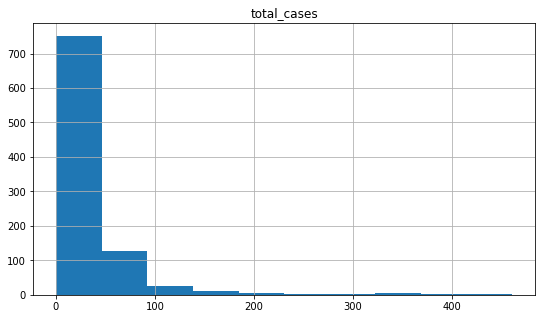

In [52]:
plt.rcParams["figure.figsize"] = [9,5]
y_sj.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126524b38>]],
      dtype=object)

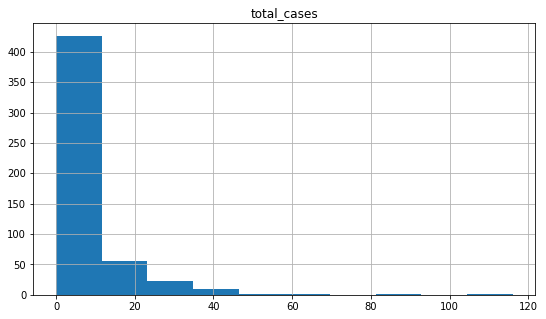

In [53]:
plt.rcParams["figure.figsize"] = [9,5]
y_iq.hist()

In [54]:
X_sj['total_cases'] = y_sj.total_cases
X_iq['total_cases'] = y_iq.total_cases

In [55]:
# compute the correlations
sj_correlations = X_sj.corr()
iq_correlations = X_iq.corr()

Text(0.5, 1.0, 'San Juan Variable Correlations')

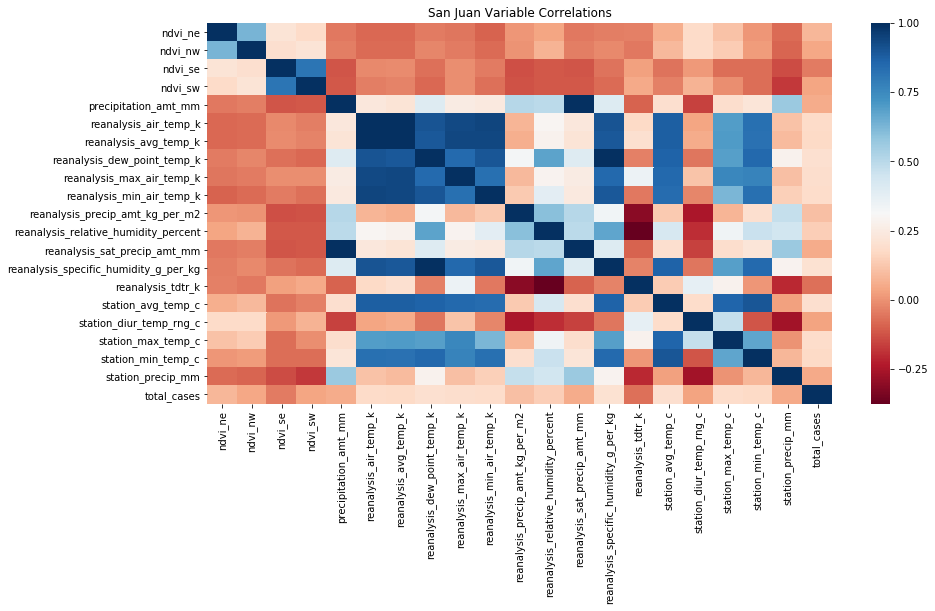

In [56]:
# plot san juan
plt.rcParams["figure.figsize"] = [14,7]
sj_corr_heat = sns.heatmap(sj_correlations,cmap='RdBu')
plt.title('San Juan Variable Correlations')

Text(0.5, 1.0, 'Iquitos Variable Correlations')

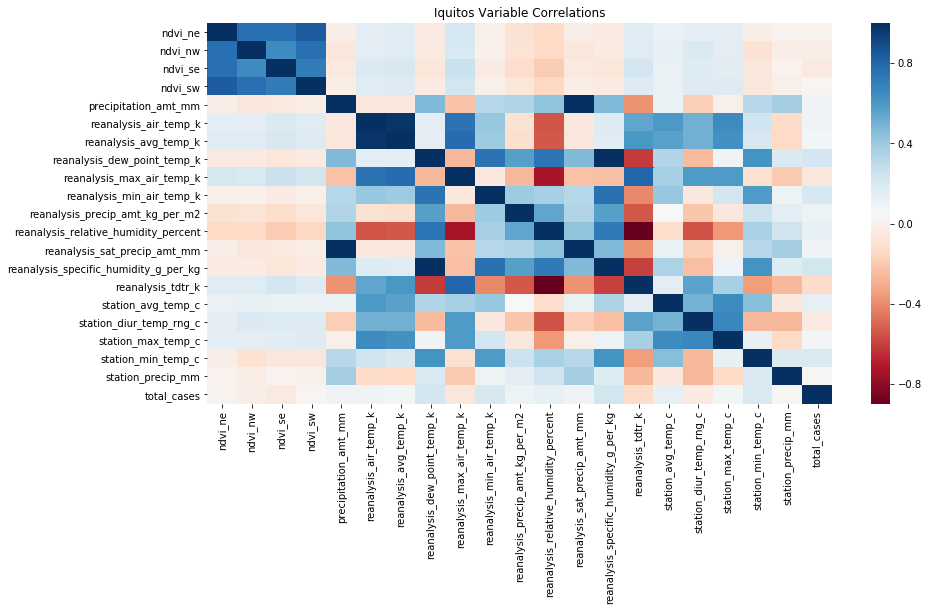

In [57]:
# plot san juan
plt.rcParams["figure.figsize"] = [14,7]
sj_corr_heat = sns.heatmap(iq_correlations,cmap='RdBu')
plt.title('Iquitos Variable Correlations')

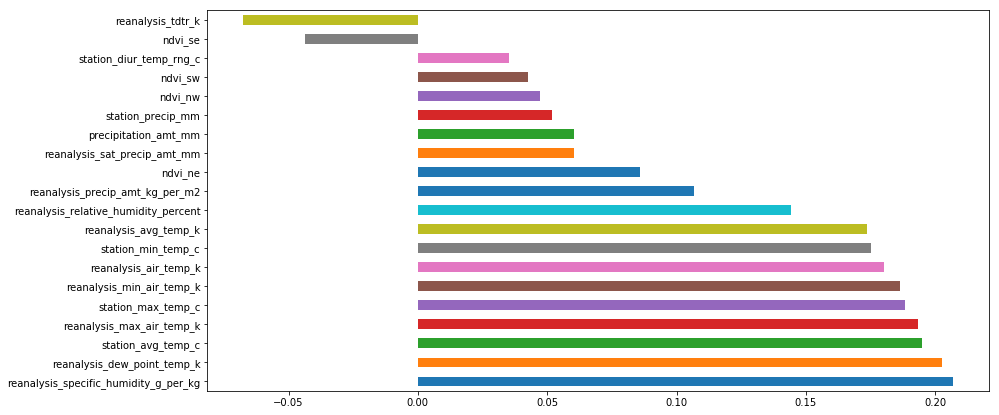

In [58]:
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') 
     .sort_values(ascending=False)
     .plot
     .barh())

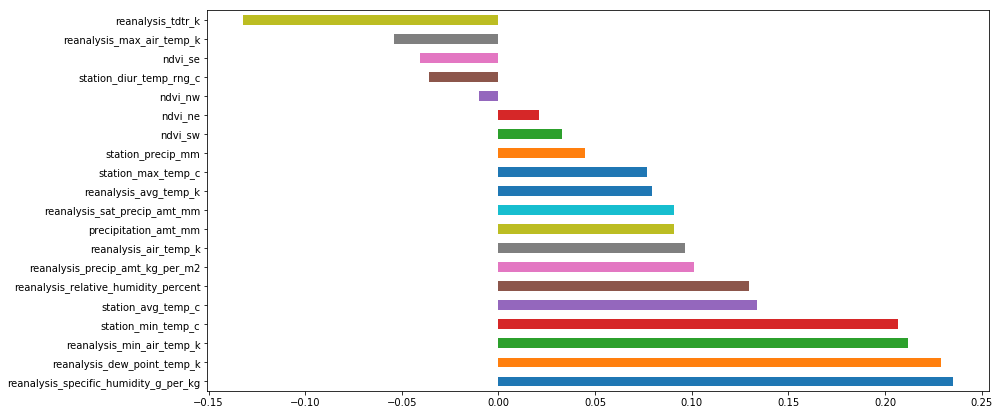

In [59]:
# Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') 
     .sort_values(ascending=False)
     .plot
     .barh())

In [60]:
X_sj.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,...,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.058096,0.066264,0.177090,0.166088,35.385304,299.157295,299.270520,295.103507,301.391506,297.297222,...,78.568907,35.385304,16.546255,2.514225,26.997940,6.753892,31.596207,22.593803,26.778846,34.180556
std,0.102660,0.091292,0.056926,0.055776,44.528272,1.236323,1.218688,1.567907,1.259365,1.293459,...,3.380444,44.528272,1.558857,0.498134,1.415530,0.835684,1.719618,1.505416,29.241411,51.381372
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,295.938571,296.114286,289.642857,297.800000,292.600000,...,66.735714,0.000000,11.715714,1.357143,22.842857,4.528571,26.700000,17.800000,0.000000,0.000000
25%,0.004267,0.016487,0.138936,0.129457,0.000000,298.190714,298.291071,293.832857,300.400000,296.300000,...,76.246786,0.000000,15.225714,2.157143,25.814286,6.200000,30.600000,21.700000,6.900000,9.000000
50%,0.058129,0.065950,0.176523,0.166900,20.775000,299.239286,299.378571,295.447143,301.500000,297.500000,...,78.670714,20.775000,16.832143,2.450000,27.214286,6.757143,31.700000,22.800000,17.800000,19.000000
75%,0.111223,0.113512,0.211596,0.202264,52.125000,300.130714,300.223214,296.415714,302.400000,298.400000,...,80.947143,52.125000,17.854286,2.789286,28.175000,7.285714,32.800000,23.900000,35.525000,37.000000
max,0.493400,0.437100,0.393129,0.381420,390.600000,302.200000,302.164286,297.795714,304.300000,299.900000,...,87.575714,390.600000,19.440000,4.428571,30.071429,9.914286,35.600000,25.600000,305.900000,461.000000


In [61]:
for cln in X_sj.columns:
    if "temp_k" in cln:
        X_sj[cln] = X_sj[cln]-273.15
    if "ndvi" in cln:
        X_sj[cln] = X_sj[cln]*100

In [62]:
sj_train = X_sj.head(800)
sj_test = X_sj.tail(X_sj.shape[0] - 800)

iq_train = X_iq.head(400)
iq_test = X_iq.tail(X_iq.shape[0] - 400)

In [63]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf
import statsmodels.api as sm

def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = 'total_cases ~ 1 + ' \
                    'ndvi_ne +'\
                    'ndvi_nw +'\
                    'ndvi_se +'\
                    'ndvi_sw +'\
                    'precipitation_amt_mm +'\
                    'reanalysis_air_temp_k +'\
                    'reanalysis_avg_temp_k +'\
                    'reanalysis_dew_point_temp_k +'\
                    'reanalysis_max_air_temp_k +'\
                    'reanalysis_min_air_temp_k +'\
                    'reanalysis_precip_amt_kg_per_m2 +'\
                    'reanalysis_relative_humidity_percent +'\
                    'reanalysis_sat_precip_amt_mm +'\
                    'reanalysis_specific_humidity_g_per_kg +'\
                    'reanalysis_tdtr_k +'\
                    'station_avg_temp_c +'\
                    'station_diur_temp_rng_c +'\
                    'station_max_temp_c +'\
                    'station_min_temp_c +'\
                    'station_precip_mm'
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score
    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model

sj_best_model = get_best_model(sj_train, sj_test)
iq_best_model = get_best_model(iq_train, iq_test)

best alpha =  1e-06
best score =  23.316176470588236
best alpha =  1e-08
best score =  7.008333333333334


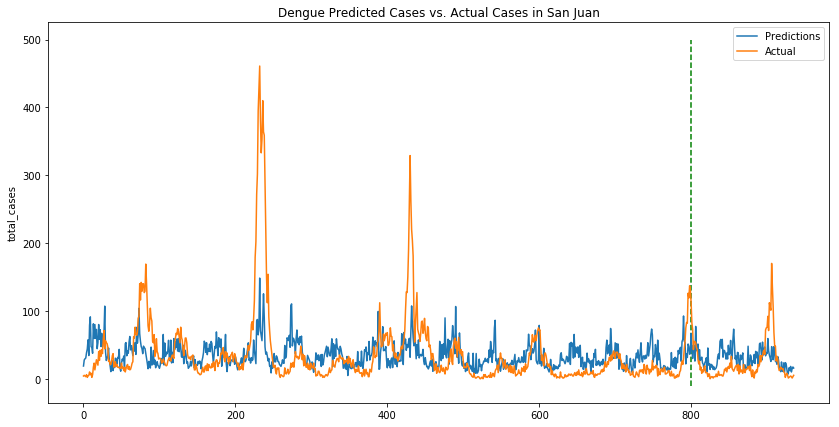

In [67]:
# plot sj
X_sj['fitted'] = sj_best_model.fittedvalues
plt.plot(X_sj.index,X_sj.fitted,label="Predictions")
plt.plot(X_sj.index,X_sj.total_cases,label="Actual")
plt.vlines(800,-10,500,colors = "green", linestyles = "dashed")
#plt.grid()
plt.ylabel("total_cases")


plt.title("Dengue Predicted Cases vs. Actual Cases in San Juan")
plt.legend()

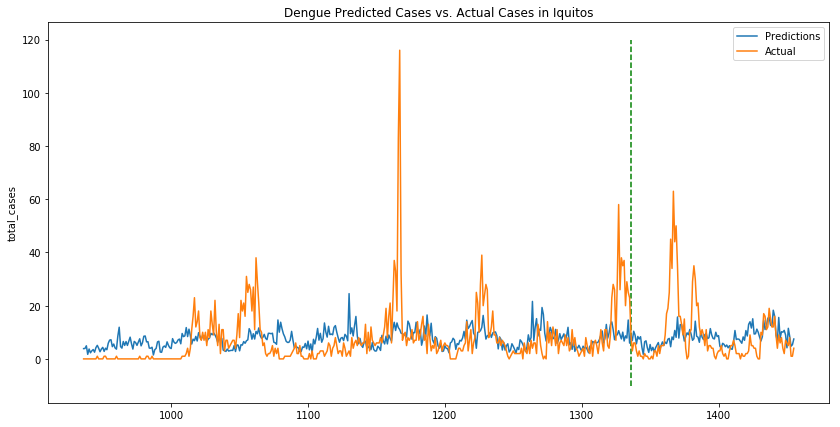

In [68]:
# plot sj
X_iq['fitted'] = iq_best_model.fittedvalues
plt.plot(X_iq.index,X_iq.fitted,label="Predictions")
plt.plot(X_iq.index,X_iq.total_cases,label="Actual")
plt.vlines(1336,-10,120,colors = "green", linestyles = "dashed")
#plt.grid()
plt.ylabel("total_cases")

plt.title("Dengue Predicted Cases vs. Actual Cases in Iquitos")
plt.legend()

In [25]:
from sklearn.ensemble import RandomForestRegressor
model_sj = RandomForestRegressor(100)
model_iq = RandomForestRegressor(100)

model_sj.fit(sj_train.drop(["total_cases"],axis=1), sj_train['total_cases'])
model_iq.fit(iq_train.drop(["total_cases"],axis=1), iq_train['total_cases'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [26]:
ypred_sj = model_sj.predict(X_sj.drop(["total_cases","fitted"],axis=1))
ypred_iq = model_iq.predict(X_iq.drop(["total_cases","fitted"],axis=1))

Text(0.5, 1.0, 'Dengue Predicted Cases vs. Actual Cases in San Juan')

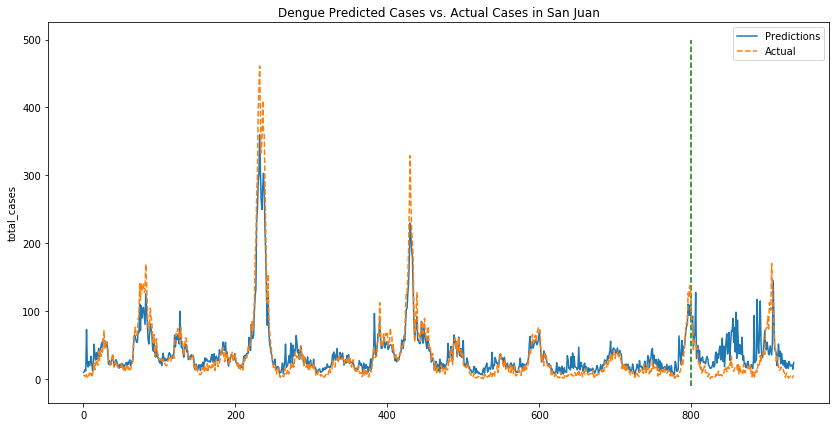

In [69]:
plt.plot(y_sj.index, ypred_sj, label="Predictions")
plt.plot(y_sj.index, y_sj["total_cases"],"--", label="Actual")
plt.legend()
plt.vlines(800,-10,500,colors = "green", linestyles = "dashed")
#plt.grid()
plt.ylabel("total_cases")
plt.title("Dengue Predicted Cases vs. Actual Cases in San Juan")

Text(0.5, 1.0, 'Dengue Predicted Cases vs. Actual Cases in Iquitos')

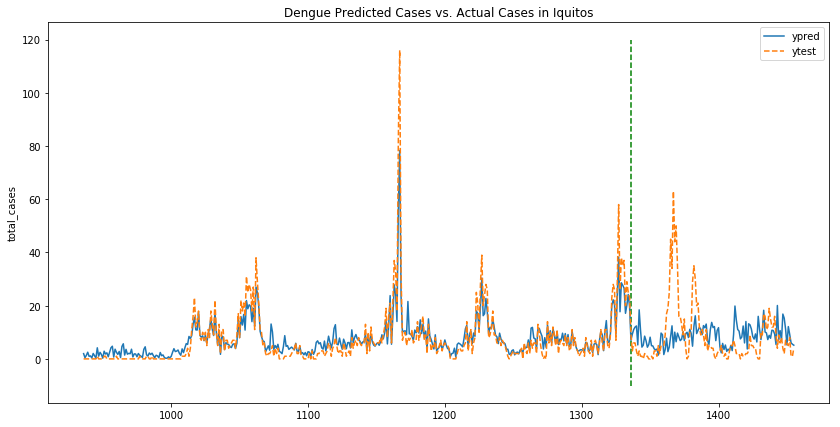

In [70]:
plt.plot(y_iq.index, ypred_iq, label="ypred")
plt.plot(y_iq.index, y_iq["total_cases"],"--", label="ytest")
plt.legend()
plt.vlines(1336,-10,120,colors = "green", linestyles = "dashed")
#plt.grid()
plt.ylabel("total_cases")
plt.title("Dengue Predicted Cases vs. Actual Cases in Iquitos")

In [29]:
print("San_Juan_score = ",eval_measures.meanabs(ypred_sj, y_sj["total_cases"]))
print("Iquitos_score = ",eval_measures.meanabs(ypred_iq, y_iq["total_cases"]))

San_Juan_score =  12.803878205128205
Iquitos_score =  3.7102307692307694


Text(0.5, 0, 'Time')

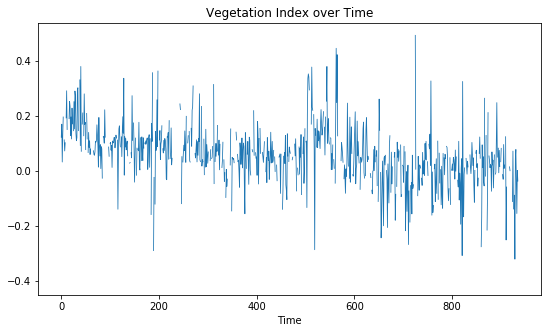

In [36]:
plt.rcParams["figure.figsize"] = [9,5]
(X_sj
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

Text(0, 0.5, 'total_cases')

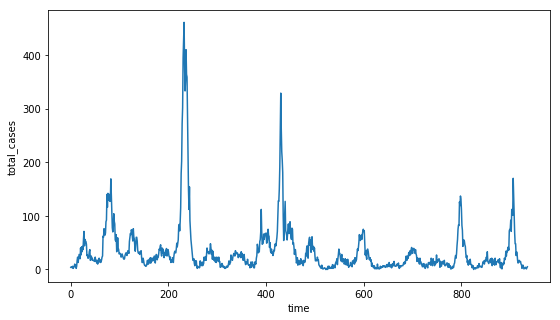

In [38]:
#plt.plot(y_sj.index, ypred_sj, label="Predictions")
plt.plot(y_sj.index, y_sj["total_cases"])#,"--", label="Actual")
#plt.legend()
#plt.vlines(800,-10,500,colors = "green", linestyles = "dashed")
#plt.grid()
plt.xlabel("time")
plt.ylabel("total_cases")

#plt.title("Dengue Predicted Cases vs. Actual Cases in San Juan")